In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
games=pd.read_csv('/content/sample_data/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [4]:
games=games.rename(columns={'Unnamed: 0':'Row'})
games.head(10)

Row                                    Title  Release Date  \
0    0                               Elden Ring  Feb 25, 2022   
1    1                                    Hades  Dec 10, 2019   
2    2  The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3    3                                Undertale  Sep 15, 2015   
4    4                            Hollow Knight  Feb 24, 2017   
5    5                                Minecraft  Nov 18, 2011   
6    6                                    Omori  Dec 25, 2020   
7    7                            Metroid Dread  Oct 07, 2021   
8    8                                 Among Us  Jun 15, 2018   
9    9                           NieR: Automata  Feb 23, 2017   

                                                Team  Rating Times Listed  \
0     ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
1                               ['Supergiant Games']     4.3         2.9K   
2  ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
3                                 ['tobyfox', '8-4']     4.2         3.5K   
4                                    ['Team Cherry']     4.4           3K   
5                                 ['Mojang Studios']     4.3         2.3K   
6                              ['OMOCAT', 'PLAYISM']     4.2         1.6K   
7                       ['Nintendo', 'MercurySteam']     4.3         2.1K   
8                                     ['InnerSloth']     3.0          867   
9                   ['PlatinumGames', 'Square Enix']     4.3         2.9K   

  Number of Reviews                                             Genres  \
0              3.9K                               ['Adventure', 'RPG']   
1              2.9K           ['Adventure', 'Brawler', 'Indie', 'RPG']   
2              4.3K                               ['Adventure', 'RPG']   
3              3.5K  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                3K                 ['Adventure', 'Indie', 'Platform']   
5              2.3K                         ['Adventure', 'Simulator']   
6              1.6K  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
7              2.1K                          ['Adventure', 'Platform']   
8               867                              ['Indie', 'Strategy']   
9              2.9K                                 ['Brawler', 'RPG']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   
5  Minecraft focuses on allowing the player to ex...   
6  A turn-based surreal horror RPG in which a chi...   
7  Join intergalactic bounty hunter Samus Aran in...   
8  Join your crew-mates in a multiplayer game of ...   
9  NieR: Automata tells the story of androids 2B,...   

                                             Reviews Plays Playing Backlogs  \
0  ["The first playthrough of elden ring is one o...   17K    3.8K     4.6K   
1  ['convinced this is a roguelike for people who...   21K    3.2K     6.3K   
2  ['This game is the game (that is not CS:GO) th...   30K    2.5K       5K   
3  ['soundtrack is tied for #1 with nier automata...   28K     679     4.9K   
4  ["this games worldbuilding is incredible, with...   21K    2.4K     8.3K   
5  ['Minecraft is what you make of it. Unfortunat...   33K    1.8K     1.1K   
6  ["The best game I've played in my life", "omor...  7.2K    1.1K     4.5K   
7  ['Have only been a Metroid fan for couple of y...  9.2K     759     3.4K   
8  ["it's a solid party game. i'm bad at lying th...   25K     470      776   
9  ['Holy shit', 'im carrying the weight of the w...   18K    1.1K     6.2K   

  Wishlist  
0     4.8K  
1     3.6K  
2     2.6K  
3     1.8K  
4     2.3K  
5      230  
6     3.8K  
7     3.3K  
8      126  
9     3

In [5]:
#Replace null values with mean
games['Rating']=games['Rating'].fillna(games['Rating'].mean())
#drop the row which has null summary
games_df=games.dropna(subset=['Summary','Team'],axis=0)

In [6]:
games_df.isnull().sum()

Row                  0
Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [7]:
games_df_standard=games_df.copy()
games_df_standard['Release Date']=pd.to_datetime(games_df_standard['Release Date'], errors='coerce')

In [8]:
games_df_standard.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1510 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row                1510 non-null   int64         
 1   Title              1510 non-null   object        
 2   Release Date       1508 non-null   datetime64[ns]
 3   Team               1510 non-null   object        
 4   Rating             1510 non-null   float64       
 5   Times Listed       1510 non-null   object        
 6   Number of Reviews  1510 non-null   object        
 7   Genres             1510 non-null   object        
 8   Summary            1510 non-null   object        
 9   Reviews            1510 non-null   object        
 10  Plays              1510 non-null   object        
 11  Playing            1510 non-null   object        
 12  Backlogs           1510 non-null   object        
 13  Wishlist           1510 non-null   object        
dtypes: datetime64

In [9]:
games_df_standard['Release Date']=games_df_standard['Release Date'].fillna(games_df_standard['Release Date'].mode()[0])

In [10]:
games_df_standard.isnull().sum().sum()

np.int64(0)

In [11]:
#Apply one hot encoding to genres column
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [12]:
games_df_standard.head()

Row                                    Title Release Date  \
0    0                               Elden Ring   2022-02-25   
1    1                                    Hades   2019-12-10   
2    2  The Legend of Zelda: Breath of the Wild   2017-03-03   
3    3                                Undertale   2015-09-15   
4    4                            Hollow Knight   2017-02-24   

                                                Team  Rating Times Listed  \
0     ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
1                               ['Supergiant Games']     4.3         2.9K   
2  ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
3                                 ['tobyfox', '8-4']     4.2         3.5K   
4                                    ['Team Cherry']     4.4           3K   

  Number of Reviews                                             Genres  \
0              3.9K                               ['Adventure', 'RPG']   
1              2.9K           ['Adventure', 'Brawler', 'Indie', 'RPG']   
2              4.3K                               ['Adventure', 'RPG']   
3              3.5K  ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                3K                 ['Adventure', 'Indie', 'Platform']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   

                                             Reviews Plays Playing Backlogs  \
0  ["The first playthrough of elden ring is one o...   17K    3.8K     4.6K   
1  ['convinced this is a roguelike for people who...   21K    3.2K     6.3K   
2  ['This game is the game (that is not CS:GO) th...   30K    2.5K       5K   
3  ['soundtrack is tied for #1 with nier automata...   28K     679     4.9K   
4  ["this games worldbuilding is incredible, with...   21K    2.4K     8.3K   

  Wishlist  
0     4.8K  
1     3.6K  
2     2.6K  
3     1.8K  
4     2.3K

In [13]:
# Convert the string representation of the list to a list of strings
games_df_standard['Genres'] = games_df_standard['Genres'].apply(lambda x: eval(x))
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(games_df_standard['Genres']), columns=mlb.classes_)
genres_encoded.columns = ['genre_' + col for col in genres_encoded.columns]

games_df_standard_encoded=pd.concat([games_df_standard, genres_encoded], axis=1)


#games_df_standard_encoded = games_df_standard_encoded.drop('Genres', axis=1)
display(games_df_standard_encoded.head())

Row                                    Title Release Date  \
0  0.0                               Elden Ring   2022-02-25   
1  1.0                                    Hades   2019-12-10   
2  2.0  The Legend of Zelda: Breath of the Wild   2017-03-03   
3  3.0                                Undertale   2015-09-15   
4  4.0                            Hollow Knight   2017-02-24   

                                                Team  Rating Times Listed  \
0     ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
1                               ['Supergiant Games']     4.3         2.9K   
2  ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
3                                 ['tobyfox', '8-4']     4.2         3.5K   
4                                    ['Team Cherry']     4.4           3K   

  Number of Reviews                                        Genres  \
0              3.9K                              [Adventure, RPG]   
1              2.9K              [Adventure, Brawler, Indie, RPG]   
2              4.3K                              [Adventure, RPG]   
3              3.5K  [Adventure, Indie, RPG, Turn Based Strategy]   
4                3K                  [Adventure, Indie, Platform]   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   
2  The Legend of Zelda: Breath of the Wild is the...   
3  A small child falls into the Underground, wher...   
4  A 2D metroidvania with an emphasis on close co...   

                                             Reviews  ... genre_RPG  \
0  ["The first playthrough of elden ring is one o...  ...       1.0   
1  ['convinced this is a roguelike for people who...  ...       1.0   
2  ['This game is the game (that is not CS:GO) th...  ...       1.0   
3  ['soundtrack is tied for #1 with nier automata...  ...       1.0   
4  ["this games worldbuilding is incredible, with...  ...       0.0   

  genre_Racing genre_Real Time Strategy genre_Shooter  genre_Simulator  \
0          0.0                      0.0           0.0              0.0   
1          0.0                      0.0           0.0              0.0   
2          0.0                      0.0           0.0              0.0   
3          0.0                      0.0           0.0              0.0   
4          0.0                      0.0           0.0              0.0   

   genre_Sport  genre_Strategy  genre_Tactical  genre_Turn Based Strategy  \
0          0.0             0.0             0.0                        0.0   
1          0.0             0.0             0.0                        0.0   
2          0.0             0.0             0.0                        0.0   
3          0.0             0.0             0.0                        1.0   
4          0.0             0.0             0.0                        0.0   

   genre_Visual Novel  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 37 columns]

In [14]:
games_df_standard_encoded.isnull().sum().sum()


np.int64(74)

In [15]:
games_df_standard_encoded = games_df_standard_encoded.dropna(axis=0)

In [16]:
games_df_standard_encoded.isnull().sum().sum()

np.int64(0)

In [17]:
games_df_standard_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1508 entries, 0 to 1509
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row                        1508 non-null   float64       
 1   Title                      1508 non-null   object        
 2   Release Date               1508 non-null   datetime64[ns]
 3   Team                       1508 non-null   object        
 4   Rating                     1508 non-null   float64       
 5   Times Listed               1508 non-null   object        
 6   Number of Reviews          1508 non-null   object        
 7   Genres                     1508 non-null   object        
 8   Summary                    1508 non-null   object        
 9   Reviews                    1508 non-null   object        
 10  Plays                      1508 non-null   object        
 11  Playing                    1508 non-null   object        
 12  Backlogs   

         Row                                       Title  Rating
1252  1252.0           Elden Ring: Shadow of the Erdtree     4.8
539    539.0                Umineko: When They Cry Chiru     4.6
1322  1322.0        Bloodborne: Game of the Year Edition     4.6
428    428.0                               Disco Elysium     4.6
43      43.0                                 Outer Wilds     4.6
1198  1198.0  Metal Gear Solid 3: Snake Eater HD Edition     4.6
1286  1286.0                                 Tokyo Necro     4.6
252    252.0                Umineko: When They Cry Chiru     4.6
894    894.0                               Disco Elysium     4.6
991    991.0             Metal Gear Solid 3: Subsistence     4.6


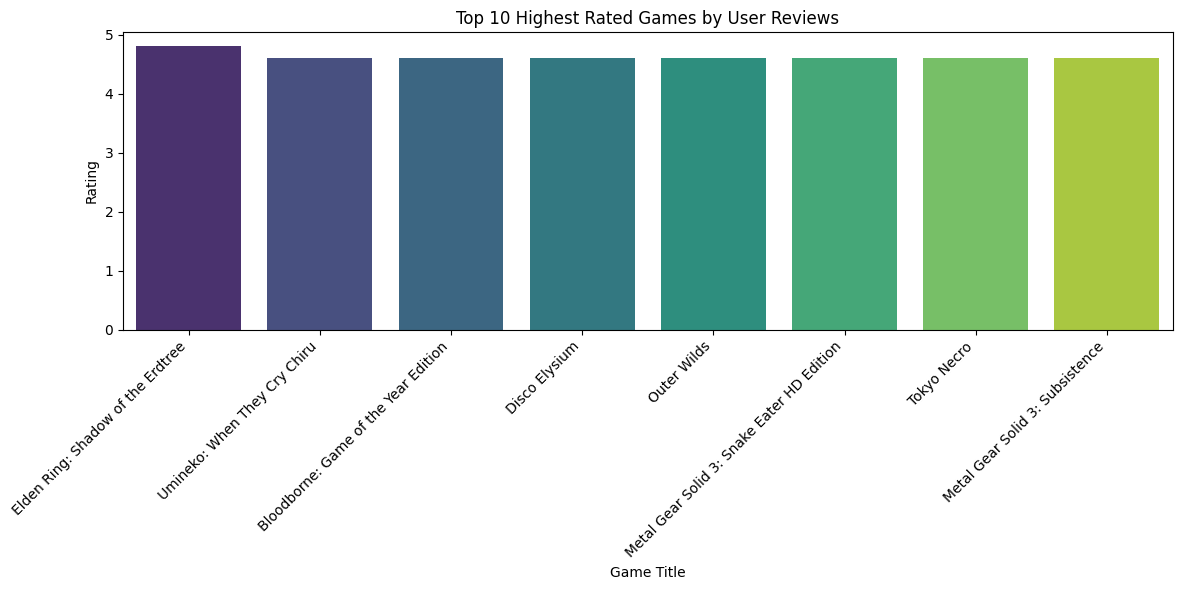

In [ ]:
#1.What are the top rated games by user reviews
top_10_rated_games = games_df_standard_encoded.sort_values(by='Rating', ascending=False).head(10)
print(top_10_rated_games[['Row','Title','Rating']])
# Create a bar plot of the top 10 rated games
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Rating', hue='Title', data=top_10_rated_games, palette='viridis', legend=False)
plt.title('Top 10 Highest Rated Games by User Reviews')
plt.xlabel('Game Title')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

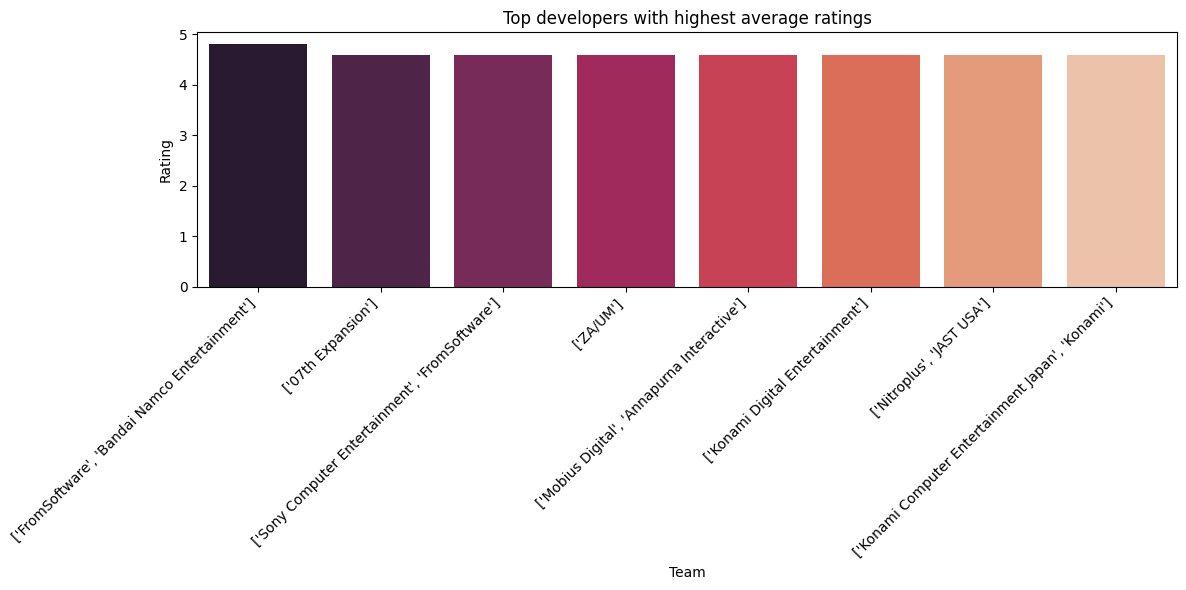

In [ ]:
#2.Which developers have the highest average ratings?
top_developers_rating=games_df_standard_encoded.groupby('Team').Rating.mean().sort_values(ascending=False).head(10)
#Create a bar plot for team with ratings
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Rating', hue='Team', data=top_10_rated_games, palette='rocket', legend=False)
plt.title('Top developers with highest average ratings')
plt.xlabel('Team')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
print(top_developers_rating)

Team
['07th Expansion']                                 4.600
['Activision', 'FromSoftware']                     4.600
['Valve']                                          4.600
['Bay 12 Games', 'Kitfox Games']                   4.600
['Sony Computer Entertainment', 'FromSoftware']    4.600
['ZA/UM']                                          4.600
['Konami Digital Entertainment']                   4.600
['Inlusio Interactive', 'IO Interactive']          4.600
['Mobius Digital', 'Annapurna Interactive']        4.575
['FromSoftware', 'Sony Computer Entertainment']    4.540
Name: Rating, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


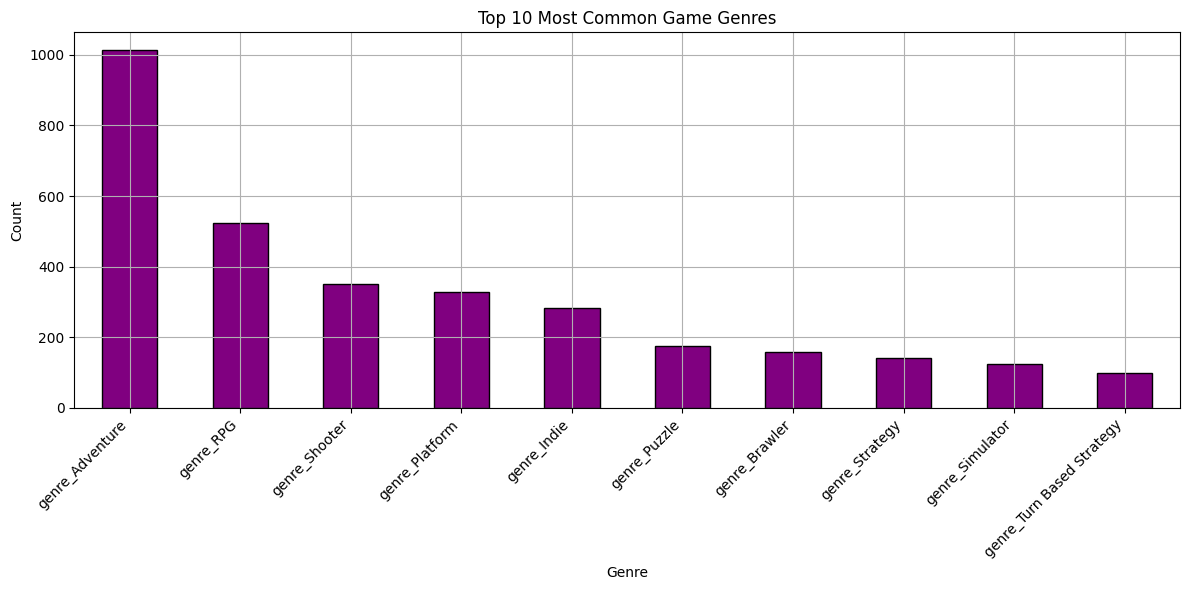

In [ ]:
#3. What are the most common genres in the dataset?
# Sum the one-hot encoded genre columns to get the total count for each genre

genre_counts = games_df_standard_encoded.filter(like='genre_').sum().sort_values(ascending=False)

# Get the top 10 most common genres
top_genres = genre_counts.head(10)

plt.figure(figsize=(12,6))
#Create a bar plot of the most common genres
top_genres.plot(kind='bar', color='purple', edgecolor='black')

plt.title('Top 10 Most Common Game Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#Which games have the highest backlog compared to wishlist?
#Convert K to 1000
def convert_k_to_numeric(k_str):
    """Converts string with 'K' to numeric."""
    if isinstance(k_str, str) and 'K' in k_str:
        return float(k_str.replace('K', '')) * 1000
    elif pd.isna(k_str): # Handle NaN values
        return np.nan
    return float(k_str)

games_df_standard_encoded['Wishlist_numeric'] = games_df_standard_encoded['Wishlist'].apply(convert_k_to_numeric)
games_df_standard_encoded['Backlogs_numeric'] = games_df_standard_encoded['Backlogs'].apply(convert_k_to_numeric)

#Visualize relationship between  Wishlist & Backlogs(two continuous) variables using Scatter plot, colored by Rating
import plotly.express as px

fig = px.scatter(games_df_standard_encoded,
                 x='Wishlist_numeric',
                 y='Backlogs_numeric',
                 color='Rating', # Color the points by Rating
                 hover_name='Title',  # Show game title on hover
                 title='Wishlist vs Backlogs for Games (Colored by Rating)')

fig.update_layout(xaxis_title='Wishlist (numeric)',
                  yaxis_title='Backlogs (numeric)')

fig.show()

In [ ]:
#5.What is the game release trend across years?
games_df_standard_encoded['Release_Year']=games_df_standard_encoded['Release Date'].dt.year
release_per_year = games_df_standard_encoded['Release_Year'].value_counts().sort_index()

# Convert the Series to a DataFrame and rename columns for Plotly Express
release_per_year_df = release_per_year.reset_index()

release_per_year_df.columns = ['Release_Year', 'Count']

fig = px.line(release_per_year_df, x='Release_Year', y='Count', title='Game Release Trend Over Years')
fig.show()

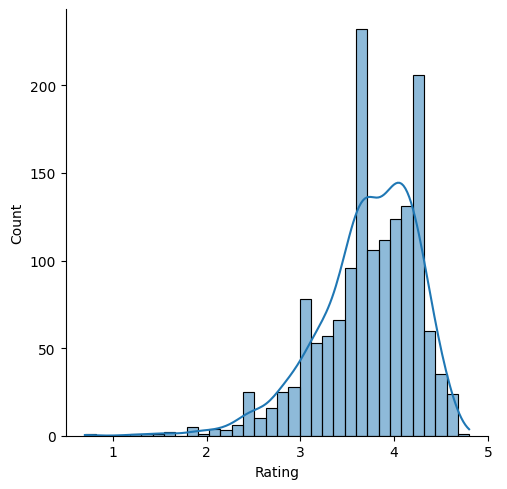

In [ ]:
#6. What is the distribution of user ratings?
games_df_standard_encoded_dist=games_df_standard_encoded['Rating'].reset_index()
sns.FacetGrid(games_df_standard_encoded,hue=None,height=5)\
    .map(sns.histplot,"Rating",kde=True)\
    .add_legend();
plt.show()

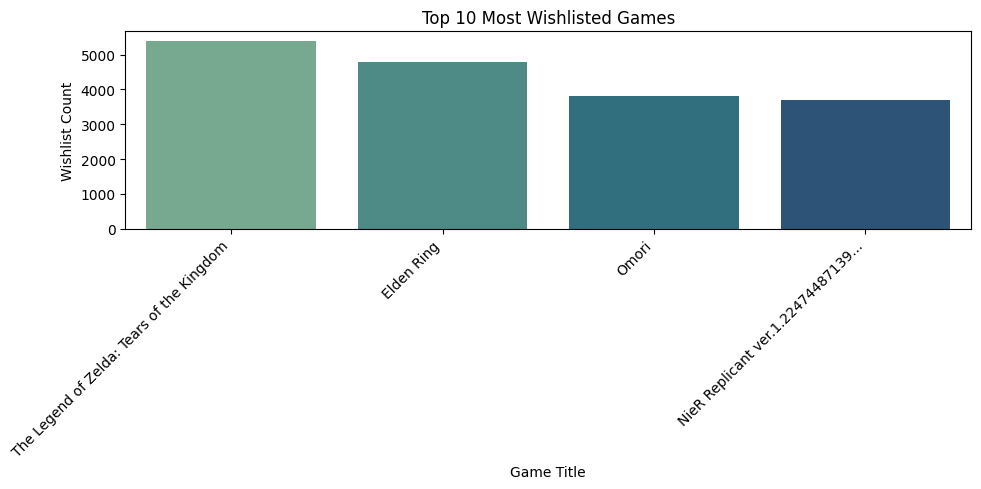

In [ ]:
#7.What are the top 10 most wishlisted games?
games_df_standard_encoded_wishlisted=games_df_standard_encoded.sort_values(by='Wishlist_numeric',ascending=False).head(10)
#Create a bar plot

plt.figure(figsize=(10,5))
sns.barplot(x='Title',y='Wishlist_numeric',hue='Title',data=games_df_standard_encoded_wishlisted,palette='crest',legend=False)
plt.title('Top 10 Most Wishlisted Games')
plt.xlabel('Game Title')
plt.ylabel('Wishlist Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#8. What’s the average number of plays per genre?
def convert_k_to_numeric(k_str):
    """Converts string with 'K' to numeric."""
    if isinstance(k_str, str) and 'K' in k_str:
        return float(k_str.replace('K', '')) * 1000
    elif pd.isna(k_str): # Handle NaN values
        return np.nan
    return float(k_str)

games_df_standard_encoded['Plays_numeric'] = games_df_standard_encoded['Plays'].apply(convert_k_to_numeric)



Average number of plays per genre:
genre_MOBA                   12966.666667
genre_Turn Based Strategy     7604.979798
genre_Shooter                 7093.676136
genre_Platform                6895.534954
genre_RPG                     6721.445507
genre_Adventure               6677.836130
genre_Brawler                 6557.817610
genre_Indie                   6137.235915
genre_Racing                  5896.023810
genre_Puzzle                  5468.477273
genre_Simulator               5321.872000
genre_Arcade                  5275.369863
genre_Sport                   5251.640000
genre_Tactical                4844.080000
genre_Strategy                4677.711268
genre_Visual Novel            4611.585714
genre_Point-and-Click         4541.717391
genre_Fighting                4390.180556
genre_Card & Board Game       2862.875000
genre_Music                   2809.520000
genre_Real Time Strategy      2596.900000
genre_Quiz/Trivia             2350.000000
genre_Pinball                 2200.000000

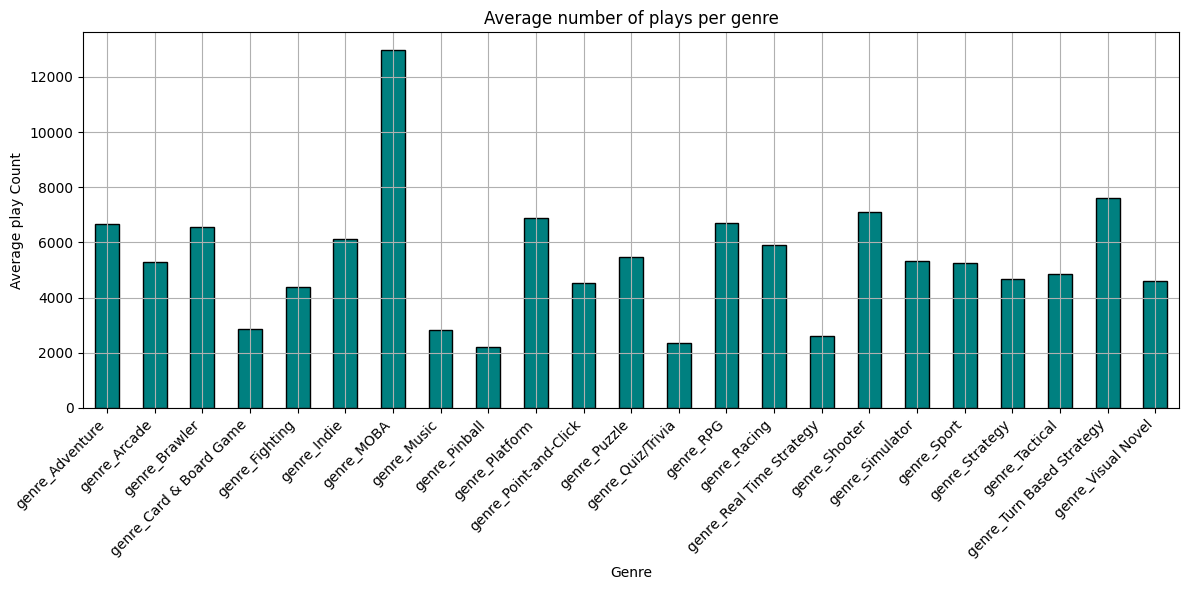

In [ ]:
#8. What’s the average number of plays per genre?
# Calculate the average number of plays for each genre using the one-hot encoded columns
# Multiply each one-hot encoded genre column by the 'Plays_numeric' column
# Then sum the results for each genre and divide by the count of games in that genre
genre_plays = games_df_standard_encoded.filter(like='genre_').multiply(games_df_standard_encoded['Plays_numeric'], axis=0)
average_plays_per_genre = genre_plays.sum() / games_df_standard_encoded.filter(like='genre_').sum()

# Display the average number of plays per genre
print("Average number of plays per genre:")
print(average_plays_per_genre.sort_values(ascending=False))


plt.figure(figsize=(12,6))
#Create a bar plot of the most common genres
average_plays_per_genre.plot(kind='bar', color='Teal', edgecolor='black')

plt.title('Average number of plays per genre')
plt.xlabel('Genre')
plt.ylabel('Average play Count')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#9.Which developer studios are the most productive and impactful?

# Calculate productivity and impact: Group the DataFrame by 'Team' and calculate the number of games released by each team (productivity) and their average rating (impact).
productivity = games_df_standard_encoded.groupby('Team').size().reset_index(name='Number of Games')
impact = games_df_standard_encoded.groupby('Team')['Rating'].mean().reset_index(name='Average Rating')

# Merge the productivity and impact dataframes
developer_stats = pd.merge(productivity, impact, on='Team')

#Plot Scatter plot to compare the productivity and number of games
fig = px.scatter(developer_stats,
                 x='Number of Games',
                 y='Average Rating',
                 hover_name='Team',  # Show team name on hover
                 title='Developer Productivity vs. Impact (Colored by Average Rating)',
                 labels={'Number of Games': 'Productivity (Number of Games)', 'Average Rating': 'Impact (Average Rating)'})

fig.show()

In [ ]:
games_df_standard_encoded.info()

NameError: name 'games_df_standard_encoded' is not defined